In [76]:
#defining the weight function
def weight(p,X,tau):
  k=X.shape[0]
  w=np.mat(np.eye(k))
  for i in range(k):
    xi=p-X[i]
    d=(-2*tau*tau)
    w[i,i]=np.exp((xi*xi.T)/d)
    return w

In [77]:
#this function used to predict the output
def predict(p,X,Y,tau):
  w=weight(p,X,tau)
  pred=(X.T*(w*X)).I*(X.T*(w*Y.T))
  return pred

In [78]:
def plot_predictions(X, Y, tau):
    m,n=np.shape(X) 
    preds = np.zeros(m)

    for i in range(m):
      preds[i]=X[i]*predict(X[i], X, Y, tau)
    return preds

In [79]:
#predicting the output based on the input
def prediction(X,Y):
  x=np.array(X)
  y=np.array(Y)
  mat_x=np.mat(x)
  mat_y=np.mat(y)
  m=np.shape(mat_y)[1]
  one=np.ones((1, m),dtype=int)
  X_=np.hstack((one.T, mat_x.T))
  print(X.shape)
  predictions=plot_predictions(X_, mat_y, 0.212)
  xsort=X_.copy()
  xsort.sort(axis=0)
  plt.scatter(X,Y, color='blue')
  plt.plot(xsort[:,1],predictions[X_[:,1].argsort(0)],color='green')
  plt.show()
  error=[]
  for i in range(len(Y)):
    error.append(((1/len(Y))*(Y[i]-predictions[i])**2))
  print("Error for the points")
  plt.plot(error)
  plt.show

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [81]:
df_data=pd.read_csv('/TrainingData.csv')
test_data=pd.read_csv('/TestingData.csv')

In [82]:
df_data

,row1,row2
0,-1.7825,0.833004
1,-0.5765,-4.904931
2,-2.9080,-9.266440
3,2.2610,8.477712
4,-0.5440,-4.757166
...,...,...
121,0.0325,1.943269
122,-2.1420,-3.343281
123,-2.1550,-3.530265
124,0.0085,1.858678


In [83]:
df_data

,row1,row2
0,-1.7825,0.833004
1,-0.5765,-4.904931
2,-2.9080,-9.266440
3,2.2610,8.477712
4,-0.5440,-4.757166
...,...,...
121,0.0325,1.943269
122,-2.1420,-3.343281
123,-2.1550,-3.530265
124,0.0085,1.858678


Prediction for training data
(126,)


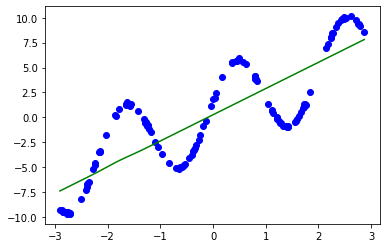

Error for the points


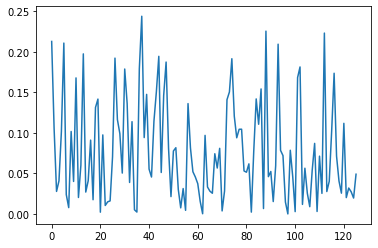

In [84]:
#Training the model with training data
X=df_data['row1']
Y=df_data['row2']
print("Prediction for training data")
prediction(X,Y)

Prediction for test data
(10,)


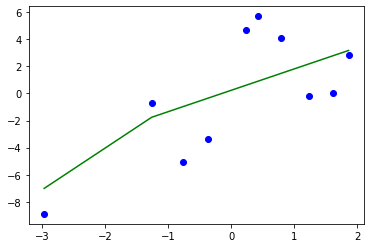

Error for the points


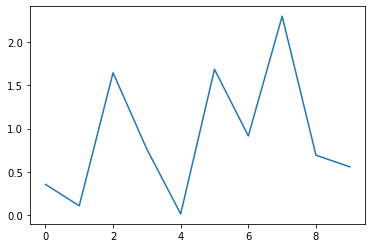

In [85]:
#predicting for the test data
X=test_data['row1']
Y=test_data['row2']
print("Prediction for test data")
prediction(X,Y)

Prediction for first 20 elements of data
(20,)


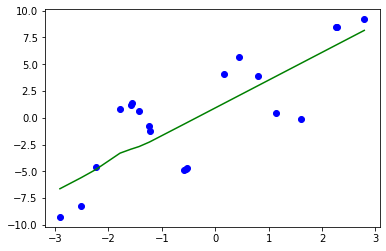

Error for the points


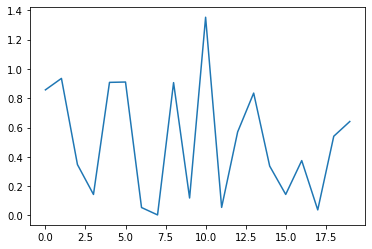

In [86]:
#predicting for first 20 elements of the training dataset
first_20_elements=df_data.head(20).copy()
X=first_20_elements['row1']
Y=first_20_elements['row2']
print("Prediction for first 20 elements of data")
prediction(X,Y)